In [1]:
#importing necessary library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
#reading csv and storing it in df
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### check for nulls

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

#### check for datatypes

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#### seperating numerical data and categorical data and plotting

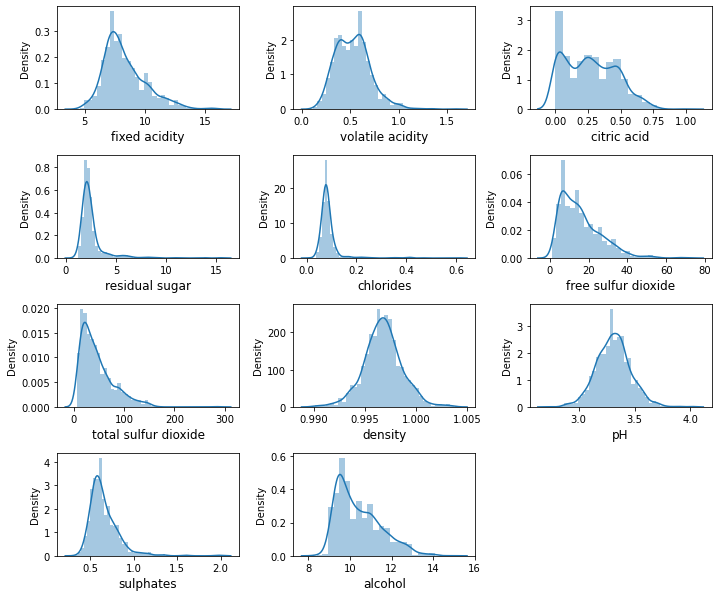

In [5]:
#storing numerical dataset to B and plotting to view its distribution
B=df.drop('quality',axis=1).copy()
j=0
plt.figure(figsize=(10,10))
for column in B:
    plt.subplot(5,3,j+1)
    sns.distplot(B[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout() 

fixed acidity is positively skewed, data is concentrated around 6, most of the wine has fixed acidity in range 5-10, presence of outliers can be clearly observed

volatile acidity is almost normally distributed but has two modes around 0.025 and 0.075 with datas concentrated in between 0.005 to 1

citric acid has three modes, it also has value of 0 not sure if wine citric acid can have such value 

residual sugar appears to be uniformly distributed has only one mode, presence of outliers on the right half,  most of data is concentrated around 2.5

chlorides it appears to be unifomly distributed, data concentrated around 0.1, value lies in the rang of 0.05 to 0.2, presence of outliers on the right half of the graph

free sulfur dioxide positively skewed data is concentrated around 10, values in the rang 0.05 to 40, presence of outliers on the right half of the graph

total sulfur dioxide postively skewed, data concentrated around 50 value in the range 0.05 to 150, presence of outliers

density negatively skewed, datas in the range 0.985 to 1.025, presence of outliers

ph uniformly distributed 

sulphates postively skewed, values in the range 0.005 to 1, presence of outliers on the right half

alcohol postively skewed, data concentrated around 10 data range between 9 to 12, presence of outliers on the right half
 


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


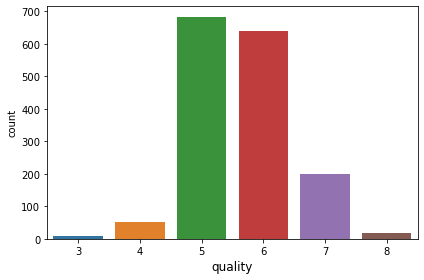

In [6]:
sns.countplot(df['quality'])
plt.xlabel('quality',fontsize=12)
print(df['quality'].value_counts())
plt.tight_layout()

#### converting quality to bad and good criteria for plotting purposes

In [7]:
#stored in df_x doing this for visualisation then later convertion is done 
df_x=df.copy()
bins = (2, 6.5, 8)
classs = ['bad', 'good']
df_x['quality'] = pd.cut(df['quality'], bins = bins, labels = classs)
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


#### Bivariate analysis

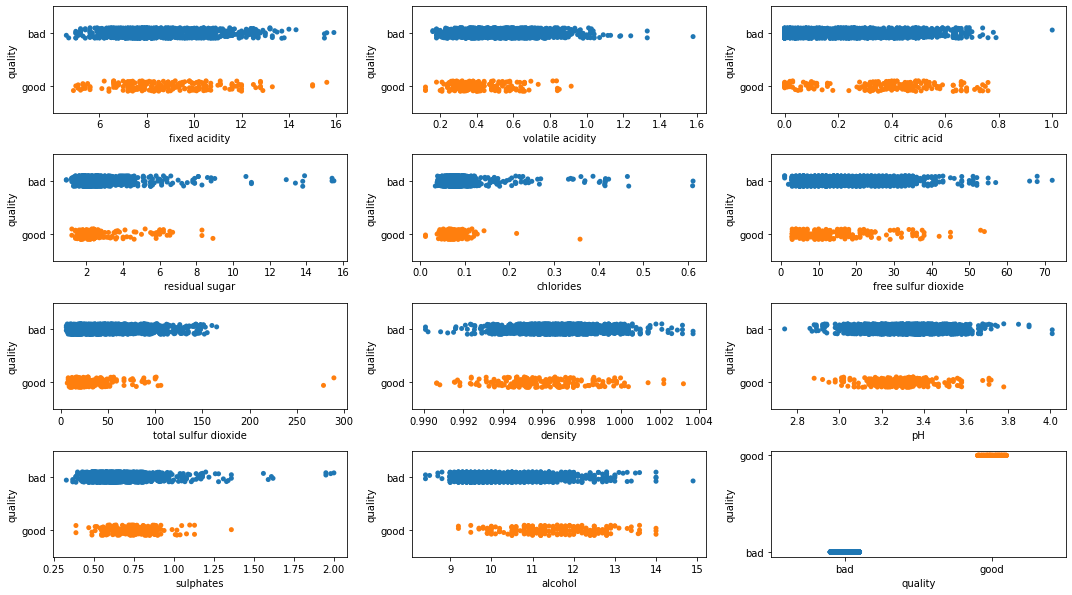

In [8]:
#plotting stripplot between rings and other features and seeing their relationship 
j=0
plt.figure(figsize=(15,10))
for column in df:
    plt.subplot(5,3,j+1)
    sns.stripplot(x=df_x[column],y=df_x['quality'],data=df)
    j+=1
plt.tight_layout() 

in general the data for good quality wine is less compared to bad quality so there is chance that data could be imbalanced, so need to do a test to confirm the same 

all the features seems to have correlation to the target

outliers presence can be seen very clearly

fixed acidity for good quality wine has data in the range 6-12 units, where as bad quality wine has datas from 4-12 units 

volatile acidity has very less data for good quality in range from 0.2-0.6 and bad quality has data from 0.2-1

citric acid has large data for bad quality which can be seen 0-0.7 anf good qulaity wine has many missing data even in the range 0.4-0.6 

residual sugar  both good and bad quality wine has many missing data both have large set of data in the range 2-4

chlorides has very large missing data or least data for good quality wine, in the case of bad quality it has strong accumulation of data in the range 0.05-0.15

free sulphur dioxide for good wine it has strong accumulation of data in the range 0.01-10 for bad wine 0.01-35 

total sulphur dioxide strong accumulation of data for good wine is from 0.05-50 and for the bad wine is from 0-120

density both the wine has uniform distribution of data with slight differnce in their range, good quality has data in range 0.994-0.998 and bad wine in the range 0.9925-1.0025

ph both the wine has uniform distribution of data with slight differnce in their range, good wine lies in range 3.2-3.4, while bad wine lies in range 3-3.6

sulphates both the wine has uniform distribution of data with slight differnce in their range, have data points in abnormal way, good wine has data in range 0.5-0.9 while bad one 0.275-1.025


alcohol both have uniform distribution, good wine lies in range 11-13 while bad wine lies in between 9.5-12.5





#### Using power transform to tranform and normalise the dataset which are numerical data types

In [9]:
#using power transform to transform and normalize the dataset and storing it in A 
from sklearn.preprocessing import power_transform
A=power_transform(B)
A=pd.DataFrame(A,columns=B.columns)
df[A.columns]=A.copy()
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,5
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,5
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,6
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864,5
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124,6
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558,6
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800,5


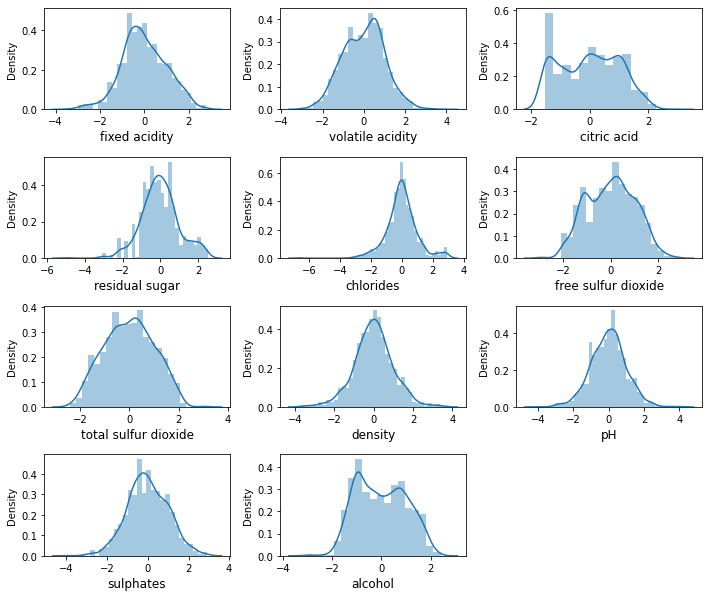

In [10]:
#plotting to see dataset after power transformation
j=0
plt.figure(figsize=(10,10))
for column in A:
    plt.subplot(5,3,j+1)
    sns.distplot(A[column])
    plt.xlabel(column,fontsize=12)
    j+=1
plt.tight_layout() 

appears to be normally distributed, except citric acid, free sulphur dioxide and alchol mostly due to prescence of outliers

#### check skewness

In [11]:
df.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
quality                 0.217802
dtype: float64

acceptable

#### checking correlation

In [12]:
df.corr()["quality"]

fixed acidity           0.104976
volatile acidity       -0.393870
citric acid             0.223351
residual sugar          0.030091
chlorides              -0.193982
free sulfur dioxide    -0.050616
total sulfur dioxide   -0.172276
density                -0.177241
pH                     -0.057577
sulphates               0.345841
alcohol                 0.467616
quality                 1.000000
Name: quality, dtype: float64

within the acceptable limits 0.65 to -0.65

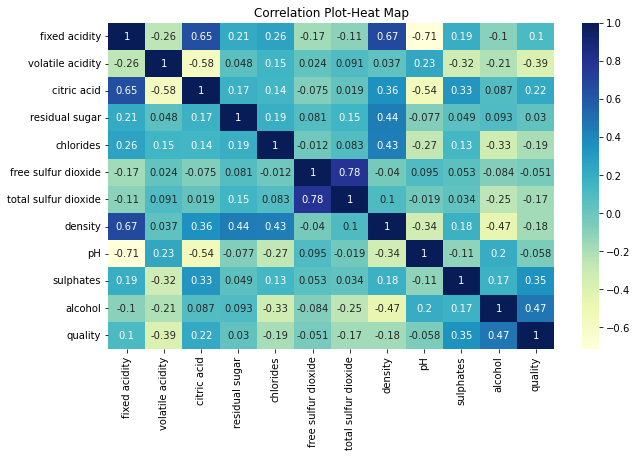

In [13]:
#plotting heatmap to see the correlation 
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.title("Correlation Plot-Heat Map")
plt.show()

features to features correlation is very low 

In [14]:
#checking for multicollinearity by using vif
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
t=df.drop('quality',axis=1)
d=sc.fit_transform(df)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(d, i)for i in range(len(t.columns))]
vif['features']=t.columns
vif

,vif,features
0,6.541966,fixed acidity
1,1.975006,volatile acidity
2,2.921206,citric acid
3,1.793387,residual sugar
4,1.392369,chlorides
5,2.864734,free sulfur dioxide
6,3.221662,total sulfur dioxide
7,6.012623,density
8,3.101910,pH
9,1.455618,sulphates


vif score is less than 10 for all features 

#### Removing outliers using z score

In [15]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df_x=df[(z<3).all(axis=1)]
data_loss=((df.shape[0]-df_x.shape[0])/df.shape[0])*100
print("data loss ", data_loss, " %")

data loss  3.0018761726078798  %


#### converting quality to bad and good criteria

In [16]:
bins = (2, 6.5, 8)
classs = ['bad', 'good']
df_x['quality'] = pd.cut(df['quality'], bins = bins, labels = classs)
df_x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,bad
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860,bad
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860,bad
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860,bad
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.993315,-0.380998,0.480036,1.397043,0.244351,-0.978746,0.906172,-0.392318,0.292864,bad
1595,-1.767458,0.227895,-0.867068,-0.008632,-1.013159,1.727353,0.457504,-0.860223,1.336627,0.874884,0.888124,bad
1596,-1.364367,0.000387,-0.683294,0.152372,-0.172896,1.235044,0.107498,-0.527497,0.718869,0.820841,0.734558,bad
1597,-1.767458,0.728553,-0.743826,-0.380998,-0.226113,1.397043,0.244351,-0.672160,1.638595,0.588344,-0.018800,bad


#### check for imbalance dataset

bad     1342
good     209
Name: quality, dtype: int64


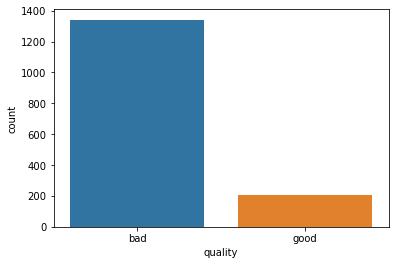

In [17]:
sns.countplot(x="quality",data=df_x)
print(df_x['quality'].value_counts())
plt.show()

data is imbalanced

#### Splitting dataset

In [18]:
X=df_x.drop(columns=["quality"])
Y=df_x[["quality"]]

#### encoding quality for machine learning

In [19]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Y)
Y

array([0, 0, 0, ..., 0, 0, 0])

#### SMOTE

In [20]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib
from imblearn.over_sampling import SMOTE

In [21]:
# by using smote we are adding data to good quality wine such that the ratio between good quality to bad quality becomes 0.75
ove_sm=SMOTE(0.75)
X_s,Y_s=ove_sm.fit_resample(X,Y)
X_s

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
1,-0.161308,1.771299,-1.531109,0.556565,0.786204,0.993852,0.854954,0.036967,-0.709517,0.395140,-0.500860
2,-0.161308,1.269801,-1.255359,0.152372,0.560696,0.193450,0.540394,0.142851,-0.310054,0.183772,-0.500860
3,1.522582,-1.550050,1.398471,-0.597145,-0.226113,0.385115,0.693699,0.669354,-0.980154,-0.392318,-0.500860
4,-0.442666,0.995542,-1.531109,-0.597145,-0.172896,-0.268045,-0.124411,0.564442,1.275690,-0.581650,-1.075025
...,...,...,...,...,...,...,...,...,...,...,...
2343,-2.099738,0.802929,-1.531109,-0.008632,0.353538,-1.946719,-1.670569,-1.585885,2.460786,0.031749,1.778703
2344,-0.527833,-1.432392,0.501240,-0.117785,-1.039704,0.649522,-0.124411,-0.892227,-0.153278,1.331375,1.038500
2345,-0.512047,-0.894001,0.271276,-0.626617,-0.817558,0.296644,-0.492279,-1.230423,-0.473037,0.686957,0.998085
2346,0.515830,-0.841303,0.840202,2.049948,-0.405314,0.382838,0.046869,0.758530,0.012627,1.193280,1.017880


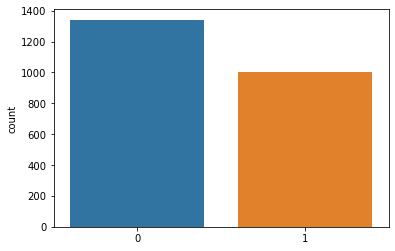

Counter({0: 1342, 1: 1006})

In [22]:
# plotting to verify the impact of smote on good quality wine dataset
sns.countplot(x=Y_s)
plt.show()
from collections import Counter
Counter(Y_s)

ratio between good and bad quality wine approx 0.75

# Running Algorithm

In [23]:
#importing necessary librairies 
#A=[] // stores test accuracy
#B=[] // stores cv_mean 
#C=[] // stores mean_squared_error
#D=[] // min diff between test accuracy and cv_score
#mae=[] // stores mean_absolute_error


from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
A=[]
B=[]
C=[]
D=[]
E=[]
mae=[]

In [28]:
#loop used to find the best random state
def max_aucroc_score(regr,X,Y):
    max_aucroc_score=0
    for r_state in range(0,100):
        x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state = r_state, test_size=0.20,stratify=Y)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        aucroc_scr=(roc_auc_score(y_test,y_pred))*100
        print("auc roc score corresponding to ",r_state," is ",aucroc_scr)
        if aucroc_scr>max_aucroc_score:
            max_aucroc_score=aucroc_scr
            final_r_state=r_state
    print("max auc roc score corresponding to ",final_r_state," is ",max_aucroc_score)
    return final_r_state

In [29]:
# used to get test accuracy, train accuracy, mse, mae,F1score,confusion matrix,classification report and auc score
def te_t(regr,x_train,x_test,y_train,y_test):
    regr.fit(x_train,y_train)
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    print(f"test accuracy is {round(roc_auc_score(y_test,y_te)*100,1)}")
    A.append(round(roc_auc_score(y_test,y_te)*100,1))
    print(f"train accuracy is {round(roc_auc_score(y_train,y_tr)*100,1)}")
    C.append(mean_squared_error(y_test,y_te))
    mae.append(mean_absolute_error(y_test,y_te))
    print("Confusion matrix \n",confusion_matrix(y_test,y_te))
    print("f1 score is : ",f1_score(y_test,y_te))
    E.append(f1_score(y_test,y_te))
    print('\n')
    print("classification report \n",classification_report(y_test,y_te))
    print("AUC ROC Score: ",roc_auc_score(y_test,y_te))

In [30]:
# used to find the best cv_score
def score(regr,x_train,x_test,y_train,y_test):
    max_cv_mean=0
    min_dif=100
    r=0
    k=0
    y_tr=regr.predict(x_train)
    y_te=regr.predict(x_test)
    t_ac=round(roc_auc_score(y_train,y_tr)*100,1)
    te_ac=round(roc_auc_score(y_test,y_te)*100,1)
    for j in range(2,20):
        cv_score=cross_val_score(regr,X,Y,cv=j)
        cv_mean=cv_score.mean()*100
        d=np.abs(cv_mean-te_ac)
        print(f"At cv is {j} cv score is {round(cv_mean,2)}  \n test accuracy is {te_ac} \n")
        if cv_mean>max_cv_mean:
            max_cv_mean=cv_mean
            k=j
        if d<min_dif:
            min_dif=d
            r=j
    B.append(max_cv_mean) 
    print("min diff between test accuracy and cv score ",min_dif," at ", r," max cv ",max_cv_mean," at ",k)
    D.append(min_dif)
    

In [31]:
from sklearn.tree import DecisionTreeClassifier
reg=DecisionTreeClassifier()
R=max_aucroc_score(reg,X,Y)

auc roc score corresponding to  0  is  70.64967250840857
auc roc score corresponding to  1  is  78.61125862984598
auc roc score corresponding to  2  is  72.9952203929899
auc roc score corresponding to  3  is  75.8585590369977
auc roc score corresponding to  4  is  76.41617985484157
auc roc score corresponding to  5  is  79.80173482032218
auc roc score corresponding to  6  is  73.66348026199327
auc roc score corresponding to  7  is  73.47760665604531
auc roc score corresponding to  8  is  76.60205346078953
auc roc score corresponding to  9  is  74.11046202867765
auc roc score corresponding to  10  is  75.4868118251018
auc roc score corresponding to  11  is  79.80173482032218
auc roc score corresponding to  12  is  77.97840325721367
auc roc score corresponding to  13  is  73.47760665604531
auc roc score corresponding to  14  is  67.97220747034874
auc roc score corresponding to  15  is  72.17649141440964
auc roc score corresponding to  16  is  71.28252788104088
auc roc score corresponding

In [32]:
x1_train,x1_test,y1_train,y1_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(reg,x1_train,x1_test,y1_train,y1_test)
print('\n')
score(reg,x1_train,x1_test,y1_train,y1_test)

test accuracy is 74.7
train accuracy is 100.0
Confusion matrix 
 [[265  15]
 [ 14  17]]
f1 score is :  0.5396825396825397


classification report 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95       280
           1       0.53      0.55      0.54        31

    accuracy                           0.91       311
   macro avg       0.74      0.75      0.74       311
weighted avg       0.91      0.91      0.91       311

AUC ROC Score:  0.7474078341013825


At cv is 2 cv score is 78.79  
 test accuracy is 74.7 

At cv is 3 cv score is 82.85  
 test accuracy is 74.7 

At cv is 4 cv score is 81.04  
 test accuracy is 74.7 

At cv is 5 cv score is 81.69  
 test accuracy is 74.7 

At cv is 6 cv score is 82.59  
 test accuracy is 74.7 

At cv is 7 cv score is 83.49  
 test accuracy is 74.7 

At cv is 8 cv score is 83.95  
 test accuracy is 74.7 

At cv is 9 cv score is 84.07  
 test accuracy is 74.7 

At cv is 10 cv score is 82.78  
 test ac

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_c=RandomForestClassifier()
R=max_aucroc_score(rf_c,X,Y)

auc roc score corresponding to  0  is  66.48079306071871
auc roc score corresponding to  1  is  75.15046910957692
auc roc score corresponding to  2  is  71.5038059833599
auc roc score corresponding to  3  is  69.75570897503984
auc roc score corresponding to  4  is  70.76031155956807
auc roc score corresponding to  5  is  78.832536732165
auc roc score corresponding to  6  is  76.63745795716056
auc roc score corresponding to  7  is  70.76031155956807
auc roc score corresponding to  8  is  83.4085678881218
auc roc score corresponding to  9  is  70.3133297928837
auc roc score corresponding to  10  is  78.832536732165
auc roc score corresponding to  11  is  77.9031687024252
auc roc score corresponding to  12  is  75.63285537263232
auc roc score corresponding to  13  is  74.8893609488405
auc roc score corresponding to  14  is  72.32253496194018
auc roc score corresponding to  15  is  75.26110816073641
auc roc score corresponding to  16  is  71.05682421667552
auc roc score corresponding to  1

In [34]:
x2_train,x2_test,y2_train,y2_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(rf_c,x2_train,x2_test,y2_train,y2_test)
print('\n')
score(rf_c,x2_train,x2_test,y2_train,y2_test)

test accuracy is 74.8
train accuracy is 100.0
Confusion matrix 
 [[258   7]
 [ 22  24]]
f1 score is :  0.6233766233766235


classification report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       265
           1       0.77      0.52      0.62        46

    accuracy                           0.91       311
   macro avg       0.85      0.75      0.79       311
weighted avg       0.90      0.91      0.90       311

AUC ROC Score:  0.74766201804758


At cv is 2 cv score is 87.17  
 test accuracy is 74.8 

At cv is 3 cv score is 87.94  
 test accuracy is 74.8 

At cv is 4 cv score is 87.88  
 test accuracy is 74.8 

At cv is 5 cv score is 86.91  
 test accuracy is 74.8 

At cv is 6 cv score is 87.3  
 test accuracy is 74.8 

At cv is 7 cv score is 87.62  
 test accuracy is 74.8 

At cv is 8 cv score is 87.75  
 test accuracy is 74.8 

At cv is 9 cv score is 87.43  
 test accuracy is 74.8 

At cv is 10 cv score is 87.88  
 test accur

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kc=KNeighborsClassifier()
R=max_aucroc_score(kc,X,Y)

auc roc score corresponding to  0  is  73.3271375464684
auc roc score corresponding to  1  is  70.0920516905647
auc roc score corresponding to  2  is  76.23030624889361
auc roc score corresponding to  3  is  66.63126217029563
auc roc score corresponding to  4  is  67.71109930961232
auc roc score corresponding to  5  is  76.97380067268543
auc roc score corresponding to  6  is  73.51301115241637
auc roc score corresponding to  7  is  67.89697291556027
auc roc score corresponding to  8  is  75.78332448220925
auc roc score corresponding to  9  is  70.46379890246061
auc roc score corresponding to  10  is  75.96919808815721
auc roc score corresponding to  11  is  68.26872012745619
auc roc score corresponding to  12  is  72.39776951672863
auc roc score corresponding to  13  is  67.07824393698
auc roc score corresponding to  14  is  71.39316693220039
auc roc score corresponding to  15  is  72.32253496194018
auc roc score corresponding to  16  is  69.38396176314392
auc roc score corresponding t

In [36]:
x3_train,x3_test,y3_train,y3_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(kc,x3_train,x3_test,y3_train,y3_test)
print('\n')
score(kc,x3_train,x3_test,y3_train,y3_test)

test accuracy is 71.5
train accuracy is 78.9
Confusion matrix 
 [[252  13]
 [ 24  22]]
f1 score is :  0.54320987654321


classification report 
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       265
           1       0.63      0.48      0.54        46

    accuracy                           0.88       311
   macro avg       0.77      0.71      0.74       311
weighted avg       0.87      0.88      0.87       311

AUC ROC Score:  0.7146021328958162


At cv is 2 cv score is 86.52  
 test accuracy is 71.5 

At cv is 3 cv score is 86.65  
 test accuracy is 71.5 

At cv is 4 cv score is 86.53  
 test accuracy is 71.5 

At cv is 5 cv score is 85.04  
 test accuracy is 71.5 

At cv is 6 cv score is 86.07  
 test accuracy is 71.5 

At cv is 7 cv score is 86.33  
 test accuracy is 71.5 

At cv is 8 cv score is 86.65  
 test accuracy is 71.5 

At cv is 9 cv score is 86.46  
 test accuracy is 71.5 

At cv is 10 cv score is 86.07  
 test accur

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
grad_c=GradientBoostingClassifier()
R=max_aucroc_score(grad_c,X,Y)

auc roc score corresponding to  0  is  72.06142680120375
auc roc score corresponding to  1  is  69.38396176314392
auc roc score corresponding to  2  is  75.33634271552488
auc roc score corresponding to  3  is  65.62665958576738
auc roc score corresponding to  4  is  68.00761196671976
auc roc score corresponding to  5  is  73.51301115241637
auc roc score corresponding to  6  is  73.88475836431226
auc roc score corresponding to  7  is  67.8217383607718
auc roc score corresponding to  8  is  81.66047087980172
auc roc score corresponding to  9  is  71.13205877146397
auc roc score corresponding to  10  is  74.33174013099664
auc roc score corresponding to  11  is  75.52221632147284
auc roc score corresponding to  12  is  76.89856611789698
auc roc score corresponding to  13  is  70.49920339883165
auc roc score corresponding to  14  is  72.32253496194018
auc roc score corresponding to  15  is  69.75570897503984
auc roc score corresponding to  16  is  71.68967958930784
auc roc score correspondi

In [38]:
x4_train,x4_test,y4_train,y4_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(grad_c,x4_train,x4_test,y4_train,y4_test)
print('\n')
score(grad_c,x4_train,x4_test,y4_train,y4_test)

test accuracy is 72.0
train accuracy is 87.2
Confusion matrix 
 [[255  10]
 [ 24  22]]
f1 score is :  0.5641025641025642


classification report 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94       265
           1       0.69      0.48      0.56        46

    accuracy                           0.89       311
   macro avg       0.80      0.72      0.75       311
weighted avg       0.88      0.89      0.88       311

AUC ROC Score:  0.7202625102543068


At cv is 2 cv score is 85.04  
 test accuracy is 72.0 

At cv is 3 cv score is 86.14  
 test accuracy is 72.0 

At cv is 4 cv score is 86.59  
 test accuracy is 72.0 

At cv is 5 cv score is 86.52  
 test accuracy is 72.0 

At cv is 6 cv score is 86.78  
 test accuracy is 72.0 

At cv is 7 cv score is 88.07  
 test accuracy is 72.0 

At cv is 8 cv score is 87.81  
 test accuracy is 72.0 

At cv is 9 cv score is 86.53  
 test accuracy is 72.0 

At cv is 10 cv score is 87.1  
 test accu

In [39]:
from sklearn.svm import SVC
svc=SVC()
R=max_aucroc_score(svc,X,Y)

auc roc score corresponding to  0  is  63.91396707381837
auc roc score corresponding to  1  is  64.62205700123916
auc roc score corresponding to  2  is  71.87555319525579
auc roc score corresponding to  3  is  54.837139316693225
auc roc score corresponding to  4  is  58.85554965480616
auc roc score corresponding to  5  is  70.49920339883165
auc roc score corresponding to  6  is  67.11364843335103
auc roc score corresponding to  7  is  59.22729686670206
auc roc score corresponding to  8  is  67.74650380598337
auc roc score corresponding to  9  is  63.542219861922455
auc roc score corresponding to  10  is  64.36094884050274
auc roc score corresponding to  11  is  64.99380421313506
auc roc score corresponding to  12  is  64.5468224464507
auc roc score corresponding to  13  is  62.35174367144627
auc roc score corresponding to  14  is  62.16587006549832
auc roc score corresponding to  15  is  60.78952026907418
auc roc score corresponding to  16  is  65.29031687024252
auc roc score correspon

In [40]:
x5_train,x5_test,y5_train,y5_test=train_test_split(X,Y,random_state=R,test_size=0.2)
te_t(svc,x5_train,x5_test,y5_train,y5_test)
print('\n')
score(svc,x5_train,x5_test,y5_train,y5_test)

test accuracy is 62.6
train accuracy is 67.8
Confusion matrix 
 [[259  11]
 [ 29  12]]
f1 score is :  0.375


classification report 
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       270
           1       0.52      0.29      0.38        41

    accuracy                           0.87       311
   macro avg       0.71      0.63      0.65       311
weighted avg       0.85      0.87      0.86       311

AUC ROC Score:  0.6259710930442638


At cv is 2 cv score is 86.46  
 test accuracy is 62.6 

At cv is 3 cv score is 87.88  
 test accuracy is 62.6 

At cv is 4 cv score is 86.91  
 test accuracy is 62.6 

At cv is 5 cv score is 86.72  
 test accuracy is 62.6 

At cv is 6 cv score is 87.62  
 test accuracy is 62.6 

At cv is 7 cv score is 87.49  
 test accuracy is 62.6 

At cv is 8 cv score is 88.2  
 test accuracy is 62.6 

At cv is 9 cv score is 87.94  
 test accuracy is 62.6 

At cv is 10 cv score is 87.94  
 test accuracy is 62.6 

In [41]:
from sklearn.metrics import roc_curve,auc
area=[]

In [42]:
y_te=reg.predict(x1_test)
fpr1,tpr1,threshold1=roc_curve(y_te,y1_test)
roc_auc1= auc(fpr1, tpr1)
area.append(roc_auc1)
print("Area under the Decision Tree ROC curve : %f" % roc_auc1)

Area under the Decision Tree ROC curve : 0.740535


In [43]:
y_te=rf_c.predict(x2_test)
fpr2,tpr2,threshold2=roc_curve(y_te,y2_test)
roc_auc2= auc(fpr2, tpr2)
area.append(roc_auc2)
print("Area under the Decision Tree ROC curve : %f" % roc_auc2)

Area under the Decision Tree ROC curve : 0.847811


In [44]:
y_te=kc.predict(x3_test)
fpr3,tpr3,threshold3=roc_curve(y_te,y3_test)
roc_auc3= auc(fpr3, tpr3)
area.append(roc_auc3)
print("Area under the Decision Tree ROC curve : %f" % roc_auc3)

Area under the Decision Tree ROC curve : 0.770807


In [45]:
y_te=grad_c.predict(x4_test)
fpr4,tpr4,threshold4=roc_curve(y_te,y4_test)
roc_auc4= auc(fpr4, tpr4)
area.append(roc_auc4)
print("Area under the Decision Tree ROC curve : %f" % roc_auc4)

Area under the Decision Tree ROC curve : 0.800739


In [46]:
y_te=svc.predict(x5_test)
fpr5,tpr5,threshold5=roc_curve(y_te,y5_test)
roc_auc5= auc(fpr5, tpr5)
area.append(roc_auc5)
print("Area under the Decision Tree ROC curve : %f" % roc_auc5)

Area under the Decision Tree ROC curve : 0.710522


In [47]:
area

[0.740535394265233,
 0.8478110599078342,
 0.7708074534161491,
 0.8007392473118279,
 0.7105223429951691]

#### Creating Table to store datas 

In [48]:
aa=['DT','RF','KNN','GRAD','SVC']

In [83]:
kk=pd.DataFrame({'test accuracy':A,'max_cv_score': B,'diff(least cv_score-test accuracy)':D,'mse':C,'mae':mae,'F1 score':E,'roc_curve_area':area},index=aa)
kk

,test accuracy,max_cv_score,diff(least cv_score-test accuracy),mse,mae,F1 score,roc_curve_area
DT,74.7,84.395806,4.085500,0.093248,0.093248,0.539683,0.740535
RF,74.8,88.721181,12.111109,0.093248,0.093248,0.623377,0.847811
KNN,71.5,86.912049,13.541386,0.118971,0.118971,0.543210,0.770807
GRAD,72.0,88.072451,13.040156,0.109325,0.109325,0.564103,0.800739
SVC,62.6,88.396359,23.859095,0.128617,0.128617,0.375000,0.710522


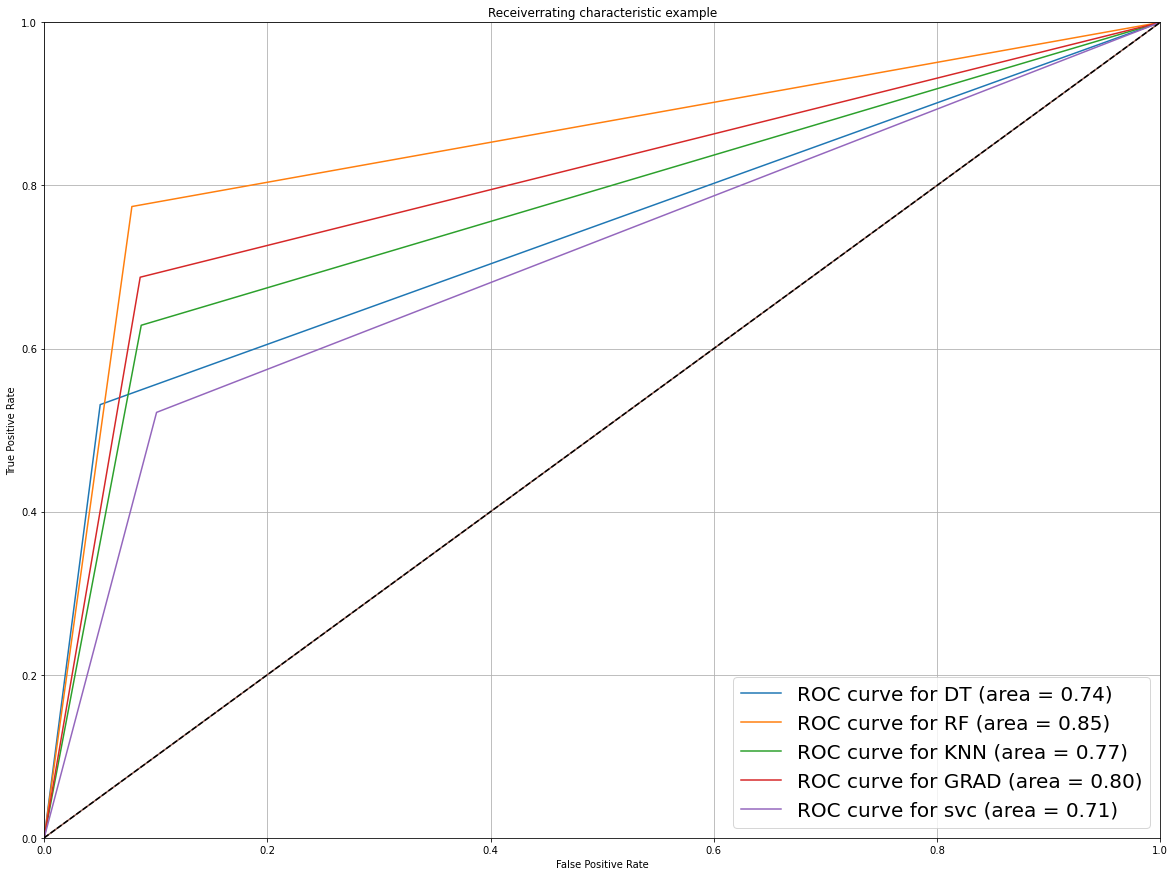

In [50]:

plt.figure(figsize = (20,15))

plt.plot(fpr1, tpr1, label = 'ROC curve for DT (area = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, label = 'ROC curve for RF (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label = 'ROC curve for KNN (area = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, label = 'ROC curve for GRAD (area = %0.2f)' % roc_auc4)
plt.plot(fpr5, tpr5, label = 'ROC curve for svc (area = %0.2f)' % roc_auc5)

plt.plot([0, 1], [0, 1], [0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiverrating characteristic example')
plt.legend(loc = 'lower right', fontsize = 20)
plt.grid(True)
plt.show()

# Infernce

#### Rf is the best model because highest area in roc_auc curve, highest test accuracy as well as cv_score, least value for mse and mae, highest f1 score and accuracy compared to other models. Here in confusion matrix aim is to predict less FALSE POSITIVES and RF has the least FP value of 7, based on the above conclusion considering RF as the most suitable model 

In [51]:
from sklearn.model_selection import GridSearchCV

In [71]:
par={'n_estimators': [3,4,5,7,10,15,18,20,30,35,40,45,50], 
     'max_features': ['log2', 'sqrt','auto'],
     'criterion': ['entropy', 'gini'],
     'max_depth': [2, 3, 5, 10,12,15,18,20,25,30,35,40],
     
}

In [72]:
grid=GridSearchCV(rf_c,par,cv=2)
grid.fit(x2_train,y2_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 15,
 'max_features': 'auto',
 'n_estimators': 50}

In [94]:
rf_c=RandomForestClassifier( criterion= 'entropy', max_depth= 15, max_features= 'auto', n_estimators= 50)
rf_c.fit(x2_train,y2_train)
y_te=rf_c.predict(x2_test)
print(f"test accuracy is {round(roc_auc_score(y2_test,y_te)*100,1)}")

test accuracy is 77.7


In [95]:
cv_score=cross_val_score(rf_c,X,Y,cv=2)
cv_mean=cv_score.mean()*100
print(cv_mean)

87.03974060525441


# test accuracy increased from 74.8 to 77.7 

#### Storing model and loading it 

In [96]:
import pickle

In [97]:
filename='wine.pkl'
pickle.dump(rf_c,open(filename,'wb'))

In [98]:
l_m=pickle.load(open('wine.pkl','rb'))
re=l_m.score(x2_test,y2_test)
print(re*100)

92.60450160771704
